<a href="https://colab.research.google.com/github/sindhuja-mulakeri/Bike-sharing-Rental-ML/blob/main/Bike_Sharing_Rental_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='6px'><font color='Green'>**Project Name**    - <font color='cyan'>Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -**  Sindhuja Sahadevappa Mulakeri
##### **Team Member 2 -**  Shubham Mishra
##### **Team Member 3 -**  Aditi jain
##### **Team Member 4 -**  Devashish Sinha
 

# **Project Summary -**

Engaging in bicycle riding can be a life-changing decision, benefiting your fitness, health, finances, and the environment. Do you recall the days when couples would ride bicycles built for two, exploring car-free or limited-traffic island destinations? Although those days still exist, most bicycle rental businesses are now concentrated in heavily visited tourist areas.

In this case study, the objective is to predict the daily bike rental count based on environmental and seasonal conditions. The dataset consists of 8760 observations, including 13 predictors and 1 target variable. These predictors describe various environmental factors and settings such as season and humidity. The goal is to develop a prediction model that can estimate the demand or count of bikes on a particular day, taking into account the environmental factors.

By building such a model, we can gain insights into the relationship between bike rentals and environmental factors, helping us understand and predict demand patterns.

# **GitHub Link -**

Sindhuja   -https://github.com/sindhuja-mulakeri/Bike-sharing-Rental-ML.git

Shubham   -https://github.com/Shubham-Mishra83/Machine-Learning-Regression-model-for-Bike-Sharing-Rental-Agreement.git

Aditi       -https://github.com/aditijain22/MachineLearning_BikeSharingDemandPrediction

Devashish- https://github.com/devashish0211/Bike-sharing-Rental-ML-project


# **Problem Statement**


The availability and accessibility of rental bikes have been introduced in numerous urban cities to improve the convenience of mobility. Efficiently predicting the number of bikes needed at different times is crucial for minimizing wait times and ensuring a consistent supply of rental bikes throughout the city. Thus, accurately forecasting the hourly bike count required has become a major concern.

---



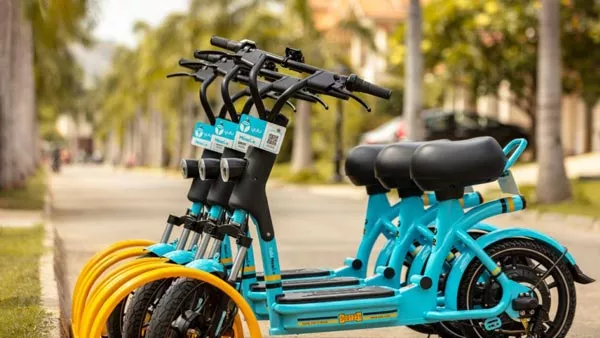

# **Data Description**

**What did you know about your dataset?**

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import loadtxt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as gp
from matplotlib import rcParams
from datetime import datetime
# Modelling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import ElasticNet

#mporting warnings library. The warnings module handles warnings in Python
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/SeoulBikeData.csv',encoding ='unicode_escape')


### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#dataset last 5 rows
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Dataset Shape
dataset.shape

(8760, 14)

### ***Data Checks to perform***
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Visualizing the missing values

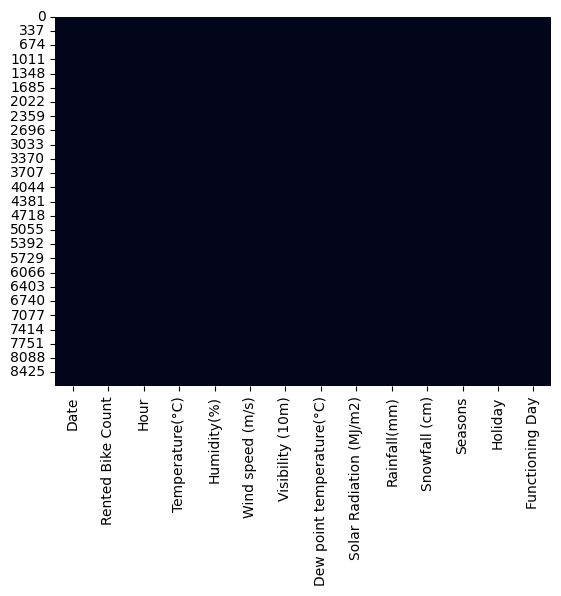

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(dataset.isnull(), cbar=False);

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Dataset Information

In [ ]:
# Missing Values/Null Values Count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

####**Check Unique Values for each variable.**

In [ ]:
#finding unique values
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

####**Check statistics of data set**

In [ ]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Variables Description 
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



## ***3. Data Wrangling***


**Exploring Data**


In [ ]:
#dataset look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#defining categorical columns
print("Categories in 'Seasons' variable:     ",end=" " )
print(dataset['Seasons'].unique())

print("Categories in 'Holiday' variable:  ",end=" ")
print(dataset['Holiday'].unique())

print("Categories in'Functioning Day' variable:",end=" " )
print(dataset['Functioning Day'].unique())


Categories in 'Seasons' variable:      ['Winter' 'Spring' 'Summer' 'Autumn']
Categories in 'Holiday' variable:   ['No Holiday' 'Holiday']
Categories in'Functioning Day' variable: ['Yes' 'No']


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

We have 4 categorical features : ['Date', 'Seasons', 'Holiday', 'Functioning Day']


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

**1. RENTED BIKE COUNT**

In [ ]:
# printing target(dependent) variable
Rented_bike_count=dataset['Rented Bike Count']
Rented_bike_count

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

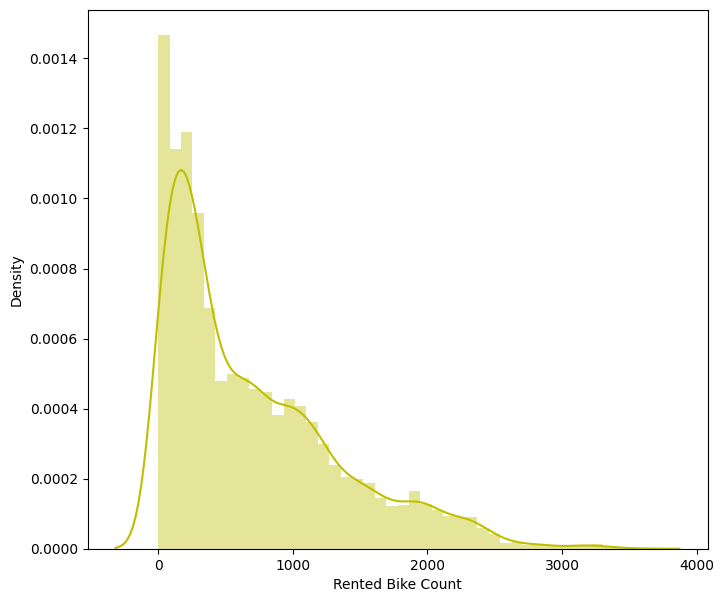

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(8,7))
# visualizing rented bike count using sns displot
sns.distplot(dataset['Rented Bike Count'],color="y")


This observation provides insights into the distribution and frequency count of the rented bike count variable.

**2.SEASONS**

In [ ]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def df_analysis(col):
  return dataset.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
#Seasons column
seasons_bike_count = df_analysis('Seasons')
seasons_bike_count

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


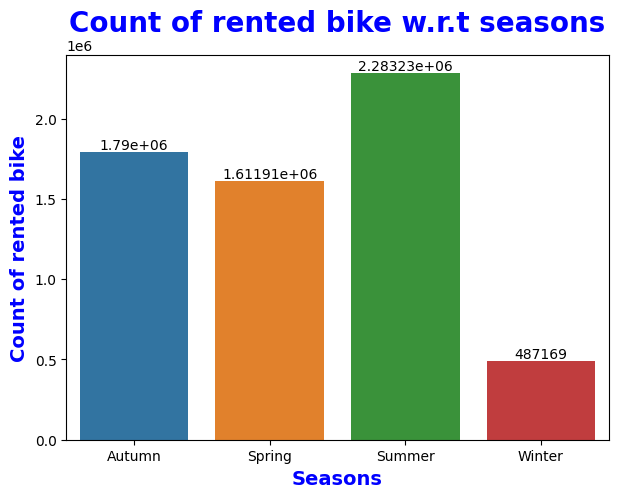

In [ ]:
#Creating a visualisation for the seasons column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.barplot(data=seasons_bike_count,x="Seasons", y="Rented Bike Count")
for i in ax.containers:
    ax.bar_label(i,)

ax.set_title('Count of rented bike w.r.t seasons',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Seasons',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data shows that during summer, above 22 lakh of the total bikes available for rent are rented, which could be attributed to the vacation atmosphere and higher tourist influx. On the other hand, winter has the lowest bike rental in numbers.

In [ ]:
#Plotting pie chart to present percentage of each season
total_season=seasons_bike_count['Seasons'].tolist()
total_bike_rent_count=seasons_bike_count['Rented Bike Count']
explode = [0, 0, 0.1, 0]

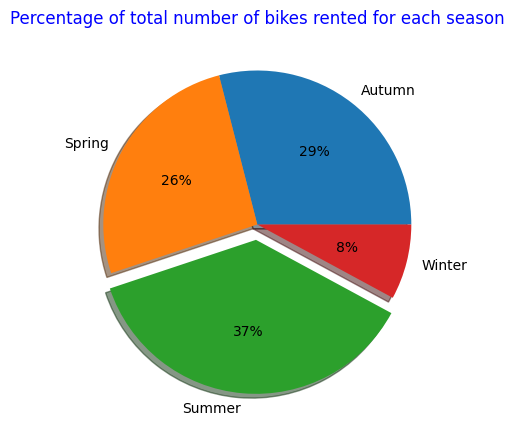

In [ ]:
# visualising using pie chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(total_bike_rent_count, labels=total_season,  explode=explode, shadow = True , autopct='%0.0f%%')
ax.set_title("Percentage of total number of bikes rented for each season",color='blue')
plt.show()

**3. HOLIDAY**

In [ ]:
#Holidays column
holiday_bike_count=df_analysis('Holiday')
holiday_bike_count

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


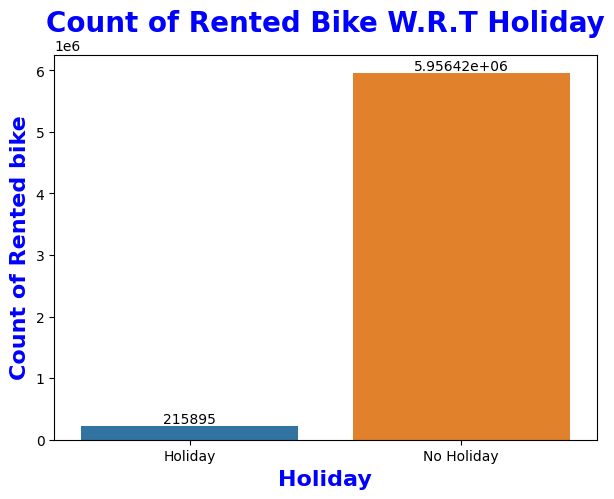

In [ ]:
#Creating a visualisation for the holiday column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.barplot(x="Holiday", y="Rented Bike Count",data=holiday_bike_count, errorbar=None)
ax.set_title('Count of Rented Bike W.R.T Holiday',size=20,fontweight='bold',color='blue')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Holiday',size=16,fontweight='bold',color='blue')
ax.set_ylabel('Count of Rented bike',size=16,fontweight='bold',color='blue')
sns.set(font_scale=1)
plt.show()


The data indicates that most bike rentals occur on non-holiday days.

**4. FUNCTION DAY**

In [ ]:
#Function day column
funcday_bike_count=df_analysis('Functioning Day')
funcday_bike_count

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


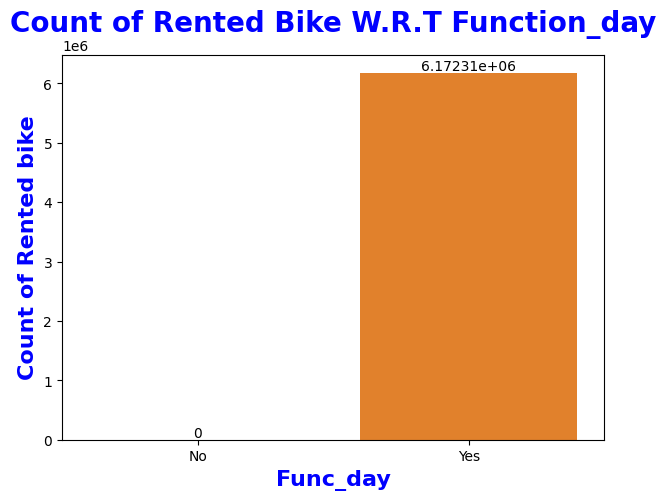

In [ ]:
#Creating a visualisation for the function column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.barplot(x="Functioning Day", y="Rented Bike Count",data=funcday_bike_count,errorbar=None)
ax.set_title('Count of Rented Bike W.R.T Function_day',size=20,fontweight='bold',color='blue')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel('Func_day',size=16,fontweight='bold',color='blue')
ax.set_ylabel('Count of Rented bike',size=16,fontweight='bold',color='blue')
sns.set(font_scale=1)
plt.show()

The data indicates that All bike rentals occur on Function- days.

**5. TEMPERATURRE**

In [ ]:
#tempreature columns
temp_bike_count=df_analysis('Temperature(°C)')
temp_bike_count.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


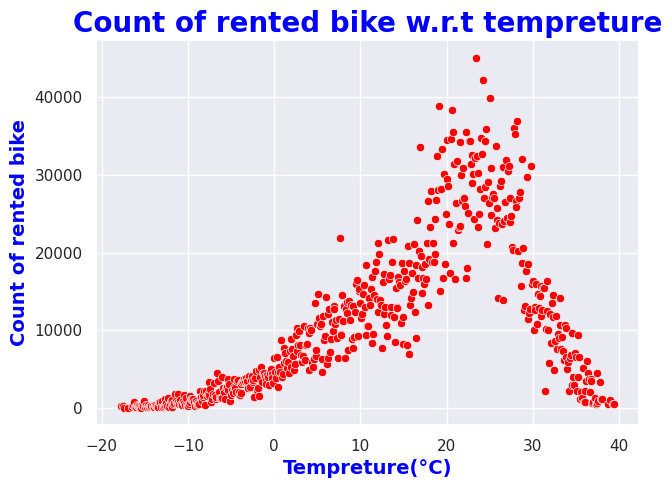

In [ ]:
#Creating a visualisation for the tempreature column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Temperature(°C)", y="Rented Bike Count",data=temp_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t tempreture',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Tempreture(°C)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data shows that the highest number of bike rentals occur when the temperature ranges from 15 to 30 degrees.

**6. HOUR**

In [ ]:
#hour column
hour_bike_count=df_analysis('Hour')
hour_bike_count.head()

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396


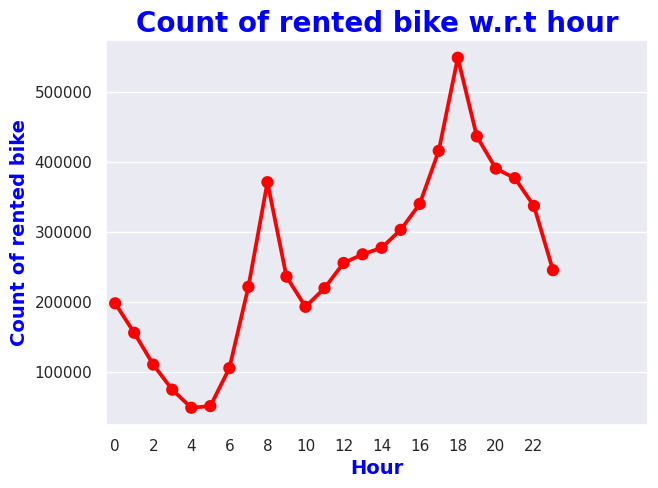

In [ ]:
#Creating a visualisation for the hour column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.pointplot(x="Hour", y="Rented Bike Count",data=hour_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t hour',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Hour',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
ax.set_xticks(range(0,30,2))
plt.show()


The data reveals that the peak time for bike rentals is at the 18th hour, which corresponds to 6pm, while the least rental activity occurs at the 4th hour, which is 4am.

**7. HUMIDITY**

In [ ]:
#humidity column
humid_bike_count=df_analysis('Humidity(%)')
humid_bike_count.head()

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353


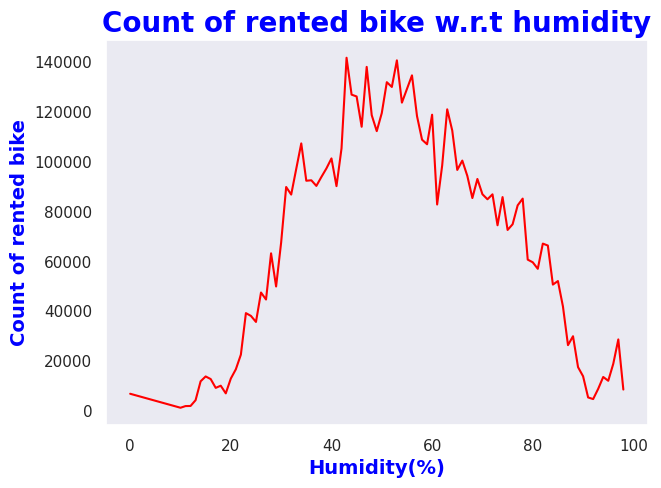

In [ ]:
#Creating a visualisation for the humidity column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.lineplot(x="Humidity(%)", y="Rented Bike Count",data=humid_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t humidity',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Humidity(%)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.grid()
plt.show()

The data indicates that most bike rentals occur when the humidity level falls within the range of 30% to 70%.

**8. VISIBILITY**

In [ ]:
#visibility column
visibility_bike_count=df_analysis('Visibility (10m)')
visibility_bike_count.sort_values(by=['Rented Bike Count'],inplace=True,ascending=False)
visibility_bike_count.head()

,Visibility (10m),Rented Bike Count
1788,2000,1836690
1783,1995,26276
1777,1989,22383
1775,1987,21544
1780,1992,21405


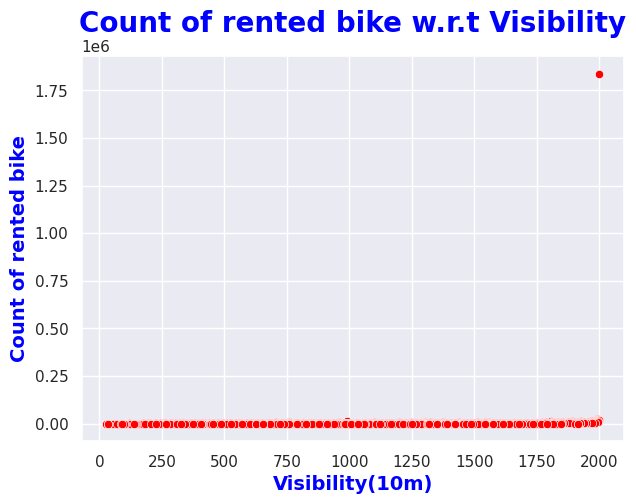

In [ ]:
#Creating a visualisation for the visibility column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Visibility (10m)", y="Rented Bike Count",data=visibility_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t Visibility',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Visibility(10m)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data suggests that customers prefer higher visibility conditions. Further examination of the visibility_bike dataframe shows that as the visibility increases, there is a corresponding increase in the number of bike rentals.

**9. RAINFALL**

In [ ]:
#rainfall column
rainfall_bike_count=df_analysis('Rainfall(mm)')
rainfall_bike_count.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


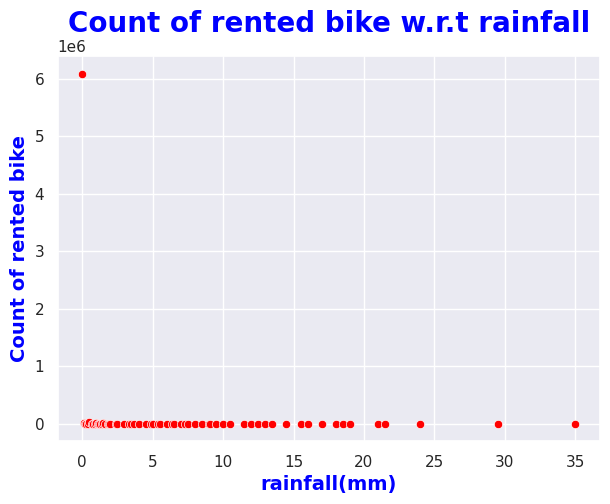

In [ ]:
#Creating a visualisation for the Rainfall column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Rainfall(mm)", y="Rented Bike Count",data=rainfall_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t rainfall',size=20,fontweight='bold',color='blue')
ax.set_xlabel('rainfall(mm)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

**10.SNOWFALL**

In [ ]:
#snowfall column
snowfall_bike_count=df_analysis('Snowfall (cm)')
snowfall_bike_count.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


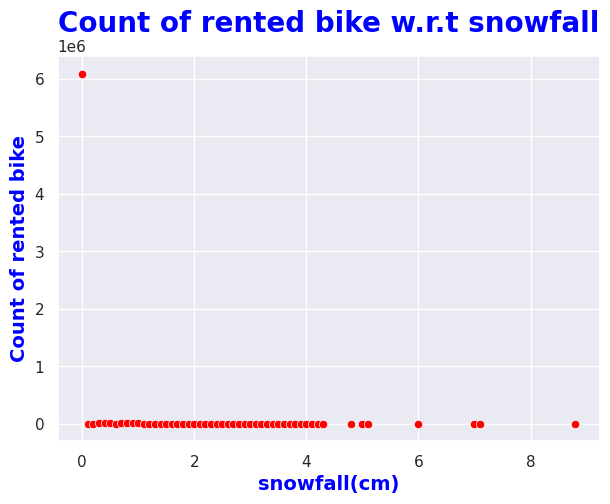

In [ ]:
#Creating a visualisation for the snowfall column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Snowfall (cm)", y="Rented Bike Count",data=snowfall_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t snowfall',size=20,fontweight='bold',color='blue')
ax.set_xlabel('snowfall(cm)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data reveals that bike rentals are highest when there is no snowfall or rainfall.

**11. DEW POINT TEMPERATURE**

In [ ]:
#dew point tempreture column
dewpnt_bike_count=df_analysis('Dew point temperature(°C)')
dewpnt_bike_count.head()

,Dew point temperature(°C),Rented Bike Count
0,-30.6,90
1,-30.5,192
2,-29.8,364
3,-29.7,71
4,-29.6,156


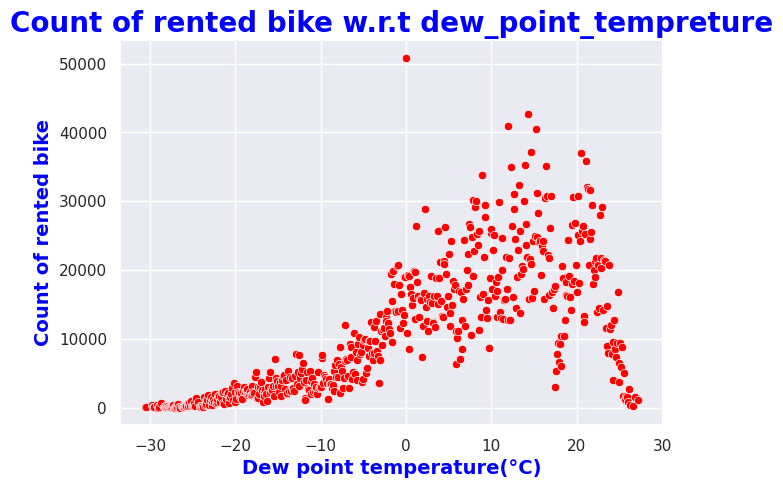

In [ ]:
#Creating a visualisation for the dew point temperature column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Dew point temperature(°C)", y="Rented Bike Count",data=dewpnt_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t dew_point_tempreture',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Dew point temperature(°C)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data indicates that the highest number of bike rentals occur when the dew point temperature ranges from 0 to 20 degrees.

**12. WIND**

In [ ]:
#wind column
wind_bike_count=df_analysis('Wind speed (m/s)')
wind_bike_count.head()

,Wind speed (m/s),Rented Bike Count
0,0.0,33154
1,0.1,28961
2,0.2,42829
3,0.3,71869
4,0.4,87556


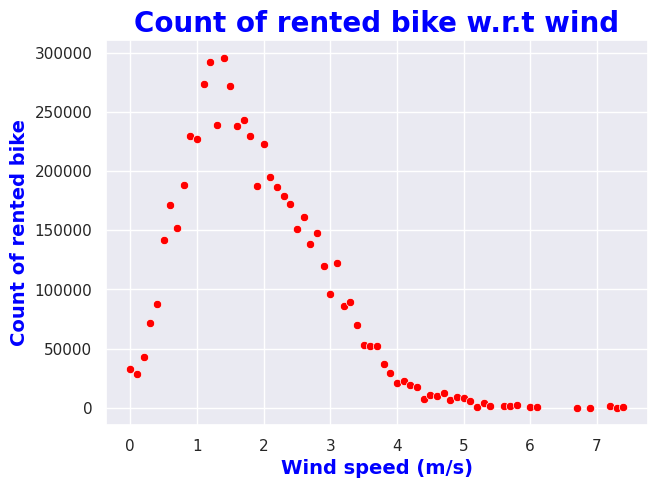

In [ ]:
#Creating a visualisation for the wind column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Wind speed (m/s)", y="Rented Bike Count",data=wind_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t wind',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Wind speed (m/s)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data suggests that the wind speed range of 1 to 3 m/s corresponds to the highest number of bike rentals.

**13. SOLAR RADIATION**

In [ ]:
#Solar radiation column
solar_bike_count=df_analysis('Solar Radiation (MJ/m2)')
solar_bike_count.head()

,Solar Radiation (MJ/m2),Rented Bike Count
0,0.00,2094379
1,0.01,100481
2,0.02,65643
3,0.03,58231
4,0.04,36019


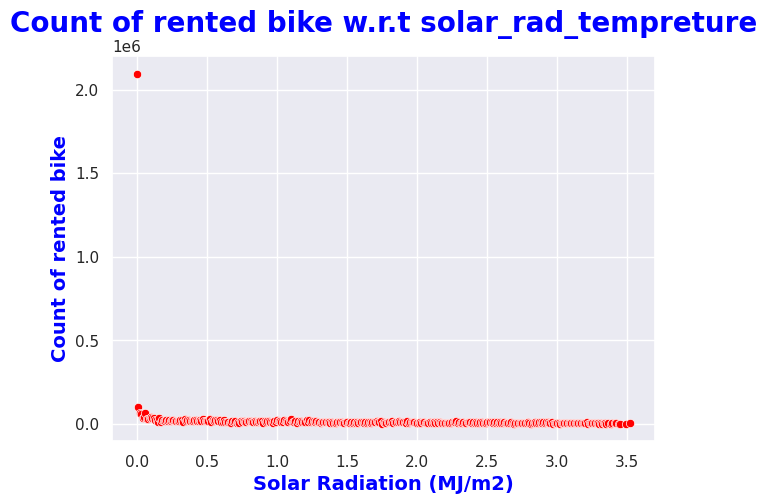

In [ ]:
#Creating a visualisation for the solar radiation column
plt.figure(figsize =(7,5))
ax=plt.axes()
p=sns.scatterplot(x="Solar Radiation (MJ/m2)", y="Rented Bike Count",data=solar_bike_count,color='red')
ax.set_title('Count of rented bike w.r.t solar_rad_tempreture',size=20,fontweight='bold',color='blue')
ax.set_xlabel('Solar Radiation (MJ/m2)',size=14,fontweight='bold',color='blue')
ax.set_ylabel('Count of rented bike',size=14,fontweight='bold',color='blue')
plt.show()

The data reveals that bike rentals are highest when there is no solar radiation.

###**Removing outliers:**
Outliers refer to data points that differ significantly from the majority of the data in a dataset. They can distort the data and impact the precision of machine learning models.

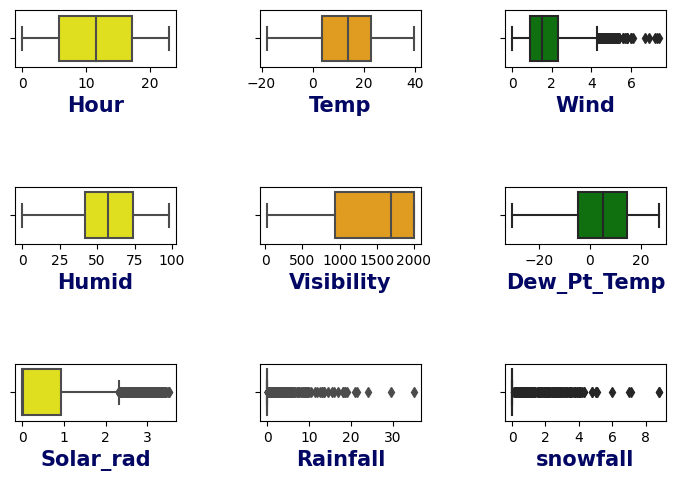

In [ ]:
##Creating a boxplot to detect columns with outliers
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(8, 6)
p=sns.boxplot(dataset,x=dataset['Hour'],orient="h",ax=axes[0][0],color='yellow')
p.set_xlabel(xlabel='Hour',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Temperature(°C)'],orient="h",ax=axes[0][1],color='orange')
p.set_xlabel(xlabel='Temp',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Wind speed (m/s)'],orient="h",ax=axes[0][2],color='green')
p.set_xlabel(xlabel='Wind',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Humidity(%)'],orient="h",ax=axes[1][0],color='yellow')
p.set_xlabel(xlabel='Humid',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Visibility (10m)'],orient="h",ax=axes[1][1],color='orange')
p.set_xlabel(xlabel='Visibility',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Dew point temperature(°C)'],orient="h",ax=axes[1][2],color='green')
p.set_xlabel(xlabel='Dew_Pt_Temp',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Solar Radiation (MJ/m2)'],orient="h",ax=axes[2][0],color='yellow')
p.set_xlabel(xlabel='Solar_rad',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Rainfall(mm)'],orient="h",ax=axes[2][1],color='orange')
p.set_xlabel(xlabel='Rainfall',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

p=sns.boxplot(dataset,x=dataset['Snowfall (cm)'],orient="h",ax=axes[2][2],color='green')
p.set_xlabel(xlabel='snowfall',fontdict={'size': 15, 'weight': 'bold', 'color': '#030764'})

fig.tight_layout(pad=5.0)
sns.set(font_scale=.6)


Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation

In [ ]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = np.percentile(dataset[outlier_cols], 25, axis=0)
Q3 = np.percentile(dataset[outlier_cols], 75, axis=0)
IQR = Q3 - Q1
IQR

array([0.  , 1.4 , 0.  , 0.93])

This code calculates the Interquartile Range (IQR) for the specified columns of a dataset. The IQR is a measure of statistical dispersion that measures the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

The code uses the numpy.percentile function to calculate the values of Q1 and Q3, where the second argument (25 and 75, respectively) specifies the percentile to be calculated. In other words, Q1 is the 25th percentile of the data and Q3 is the 75th percentile of the data.

The "dataset[outlier_cols]" selects the columns that are to be considered for outlier detection. This can be useful if there are specific columns that are suspected to contain outliers, rather than examining the entire dataset.

The resulting IQR value is then calculated by subtracting Q1 from Q3, and the final result is returned as the output of the code.

Overall, this code snippet provides a simple and efficient way to calculate the IQR for a specific subset of columns within a dataset, which can be useful in identifying potential outliers within those columns.



In [ ]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [ ]:
#Detecting and removing the outliers
dataset[outlier_cols] = dataset[outlier_cols][~((dataset[outlier_cols] < l_fence) | (dataset[outlier_cols] > u_fence))]

This code calculates the upper and lower fences for identifying potential outliers in the columns specified in outlier_cols of the dataset DataFrame.

The upper fence (u_fence) is calculated by adding 1.5 times the IQR to the 75th percentile (Q3). Any data point above this value is considered a potential outlier.

The lower fence (l_fence) is calculated by subtracting 1.5 times the IQR from the 25th percentile (Q1). Any data point below this value is considered a potential outlier.

The fences serve as cutoff points for determining which data points in the specified columns are potential outliers. Any data point outside of these fences is considered an outlier and can be examined further to determine if it is an error or a legitimate extreme value.

This applies the boolean mask to the selected columns to remove the outlier values. The resulting dataframe contains only the non-outlier values for the selected columns

In [ ]:
#Checking the number of outliers deleted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

After removing outliers, null values have emerged in four columns. To handle this, we can either eliminate the observations containing null values or replace them with meaningful values. In this situation, I will replace the null values with the median value of each respective column.

In [ ]:
#Creating a function to impute the null values created by outlier handling.
def fill_null(outlier_cols):
  for col in outlier_cols:
    dataset[col].fillna(dataset[col].median(),inplace=True)

this function is useful for handling missing data in a dataset, especially when the data has a skewed distribution and the median is a better representation of the central tendency than the mean. By filling in missing values with the median, the function helps to preserve the statistical properties of the data and prevent bias in subsequent analyses or modeling.

In [ ]:
#Calling the imputing function
fill_null(outlier_cols)

In [ ]:
#Checking the number of outliers deleted
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The successful imputation of null values indicates that we have effectively addressed the outliers.

## **5.Feature Engineering:**

To utilize categorical data in machine learning models, it is necessary to convert them into numerical variables. This process is referred to as feature encoding. In this case, we need to encode three columns, namely Seasons, Holiday, and Functioning Day.

In [ ]:
#Encoding for Seasons column
dataset['Winter'] = np.where(dataset['Seasons']=='Winter', 1, 0)
dataset['Spring'] = np.where(dataset['Seasons']=='Spring', 1, 0)
dataset['Summer'] = np.where(dataset['Seasons']=='Summer', 1, 0)
dataset['Autumn'] = np.where(dataset['Seasons']=='Autumn', 1, 0)


In [ ]:
#Removing seasons column since we dont require it now.
dataset.drop(columns=['Seasons'],axis=1,inplace=True)

In [ ]:
#Encoding for Holiday column
dataset['Holiday'] = np.where(dataset['Holiday']=='Holiday',1,0)
#Encoding for Functioning day
dataset['Functioning Day'] = np.where(dataset['Functioning Day']=='Yes',1,0)

In [ ]:
#printing the dataframe after encoding all three columns
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


####**Checking Correlation on feature removal**

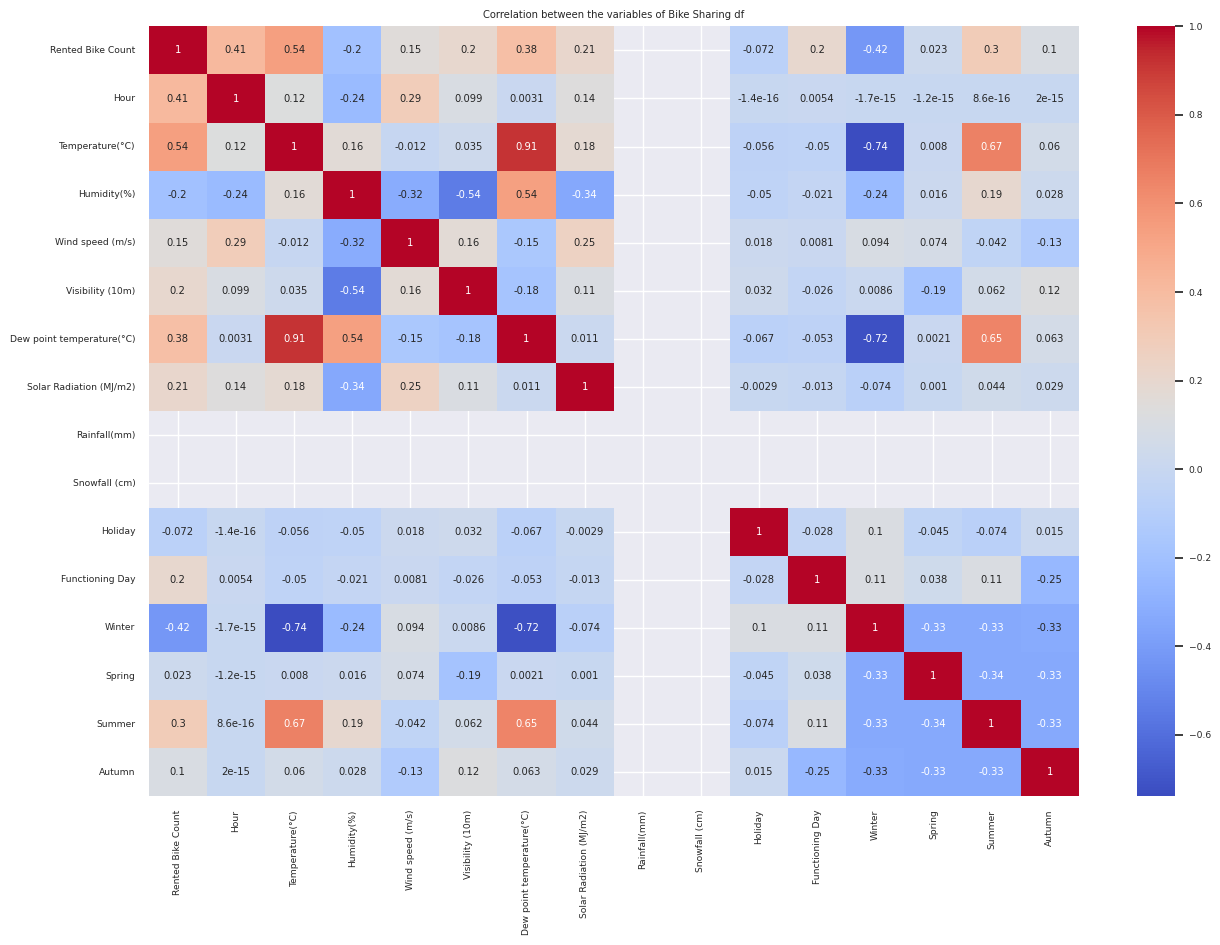

In [ ]:
#Plotting correlation matrix using sns.heatmap
corr_data = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

Due to the high correlation between the Dew point temperature and Temperature columns, it is possible to remove the former without significantly affecting the model building process. Additionally, the Date column is considered to be of little value and can also be dropped.

In [ ]:
#dropping date and dew point tempreture column
dataset.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [ ]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn'],
      dtype='object')

###**Eliminating Multicollinearity:**

>Multicollinearity is a common issue in machine learning when there are high correlations between two or more predictor variables (also called independent variables or features) in a regression model. It occurs when there are linear relationships among predictor variables, which makes it difficult to determine the independent effect of each variable on the target variable.

> To avoid multicollinearity, it is important to carefully select the variables to include in a regression model, ensuring that they are independent and have low correlations with each other. 



In [ ]:
#Creating a list of independent columns
independent_cols = list(set(dataset.columns)-{'Rented Bike Count'})
independent_cols

['Holiday',
 'Hour',
 'Snowfall (cm)',
 'Summer',
 'Humidity(%)',
 'Temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Spring',
 'Autumn',
 'Functioning Day',
 'Visibility (10m)',
 'Rainfall(mm)',
 'Wind speed (m/s)',
 'Winter']

In [ ]:
#Creating a function to calculate the variance inflation factor(VIF)
def calculate_vif(X):
    vif = pd.DataFrame(columns=['Columns', 'VIF'])
    for i in range(X.shape[1]):
        vif.loc[i, 'Columns'] = X.columns[i]
        vif.loc[i, 'VIF'] = variance_inflation_factor(X.values, i)
    return vif

This is a Python function to calculate the Variance Inflation Factor (VIF) for a set of independent variables. The function takes a pandas DataFrame as input, where each column represents an independent variable, and returns a new DataFrame with two columns: 'Columns' and 'VIF'.

In this function, a new empty DataFrame is created with two columns 'Columns' and 'VIF'. Then, a for loop is run over the range of the number of columns in the input DataFrame, X. For each column, the corresponding name is assigned to the 'Columns' column in the new DataFrame, and the VIF is calculated using the variance_inflation_factor function from the statsmodels library. The result is then assigned to the 'VIF' column in the new DataFrame.

Finally, the function returns the new DataFrame with the 'Columns' and 'VIF' columns populated with the corresponding values.





Regenerate response

In [ ]:
#Calculating the VIF for independent columns
calculate_vif(dataset[independent_cols])

,Columns,VIF
0,Holiday,1.022255
1,Hour,1.180808
2,Snowfall (cm),NaN
3,Summer,31.340811
4,Humidity(%),2.042755
5,Temperature(°C),4.443786
6,Solar Radiation (MJ/m2),1.270845
7,Spring,23.455815
8,Autumn,23.650728
9,Functioning Day,1.079354


Upon analyzing the variance inflation factor (VIF), we observed that the encoding for seasons has a very high VIF. Thus, we decided to eliminate one of the columns to address the issue of multicollinearity. Since winter has the lowest number of bikes rented, we will remove it from the dataset. Additionally, we noticed that the columns Rainfall and Snowfall have a VIF of zero, indicating that they do not have any significant impact on the target variable. Therefore, we will remove these columns from the dataset as well.

In [ ]:
#Dropping the columns which has VIF hight
dataset.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [ ]:
#Creating a list of remaining independent columns 
independent_cols = list(set(dataset.columns)-{'Rented Bike Count'})

In [ ]:
#Calculating VIF for remaining independent columns
calculate_vif(dataset[independent_cols])

,Columns,VIF
0,Hour,4.226978
1,Summer,9.199786
2,Humidity(%),10.46224
3,Temperature(°C),9.607644
4,Solar Radiation (MJ/m2),1.652737
5,Spring,3.976104
6,Autumn,4.448885
7,Functioning Day,18.833311
8,Visibility (10m),7.345935
9,Holiday,1.071381


Since Functioning Day has a VIF value greater than 10, it indicates high multicollinearity, and thus we will remove this variable.

In [ ]:
#Dropping the Functioning Day column 
dataset.drop(columns={'Functioning Day'},axis=1,inplace=True)
independent_cols = list(set(dataset.columns)-{'Rented Bike Count'})
calculate_vif(dataset[independent_cols])

,Columns,VIF
0,Hour,4.025525
1,Summer,9.167621
2,Humidity(%),5.401113
3,Temperature(°C),9.481974
4,Solar Radiation (MJ/m2),1.598384
5,Spring,3.927898
6,Autumn,4.437701
7,Visibility (10m),5.21638
8,Holiday,1.070809
9,Wind speed (m/s),4.707847


Since we no longer have any variables with a VIF greater than 10, we can proceed further.






###**To determine the degree of association(Correlation) between independent variables and a dependent variable**

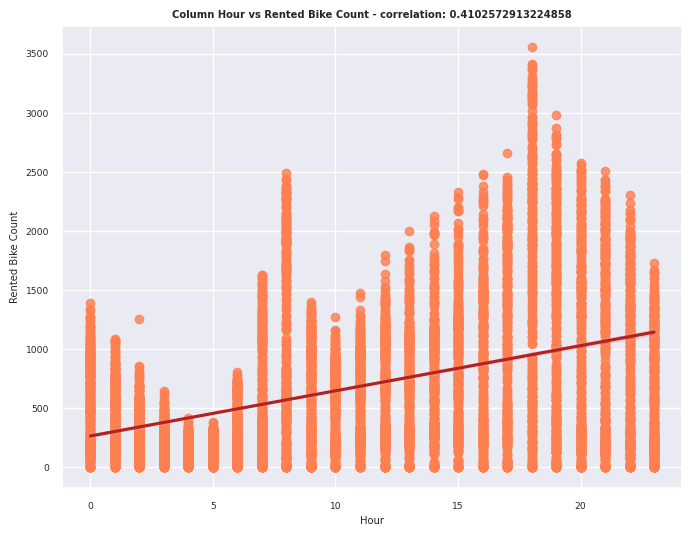

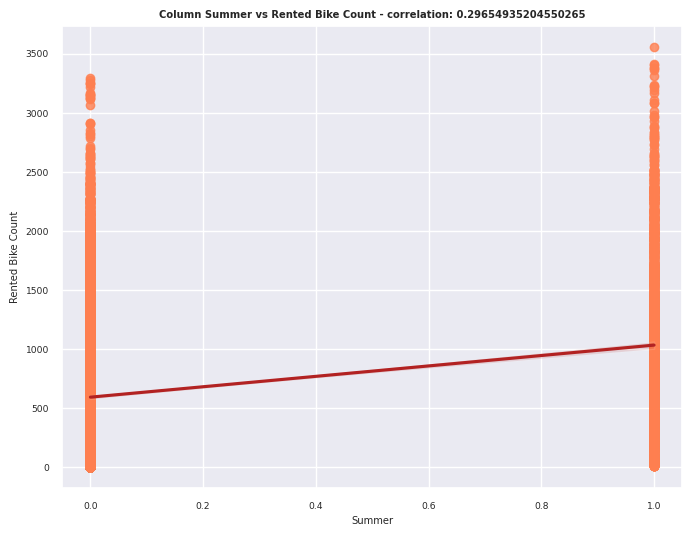

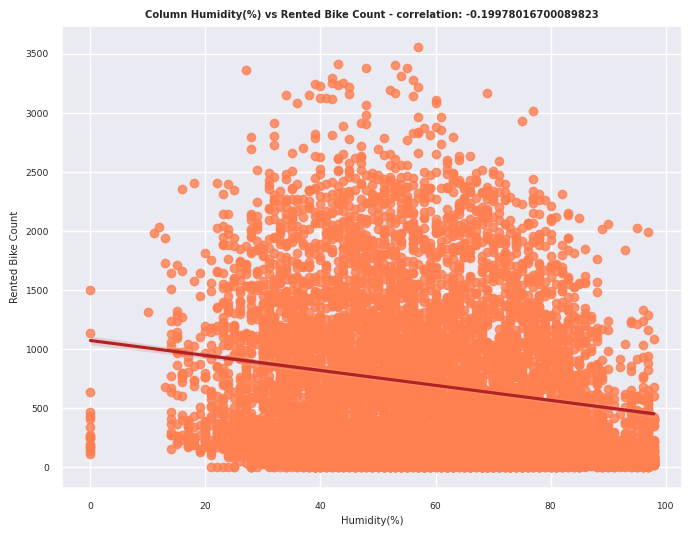

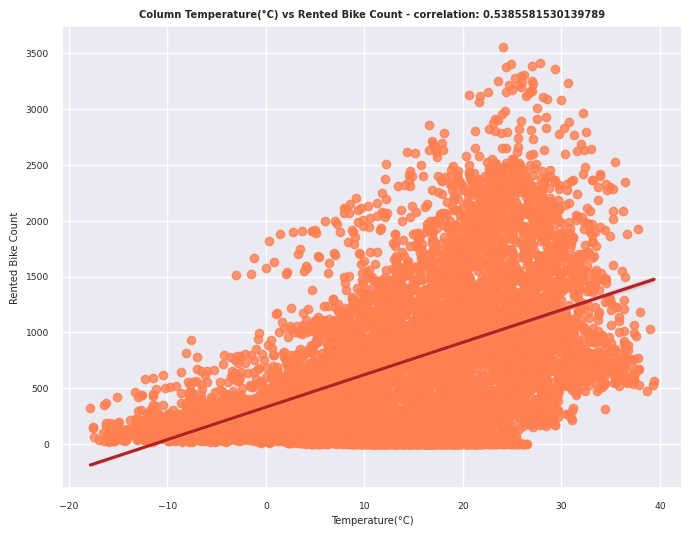

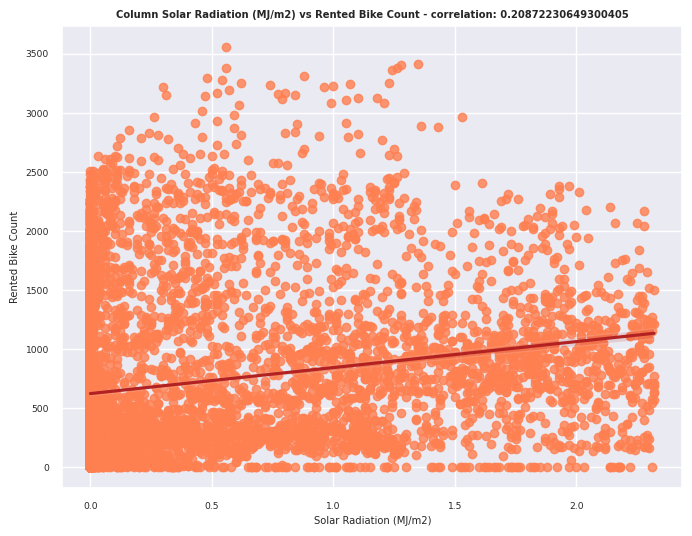

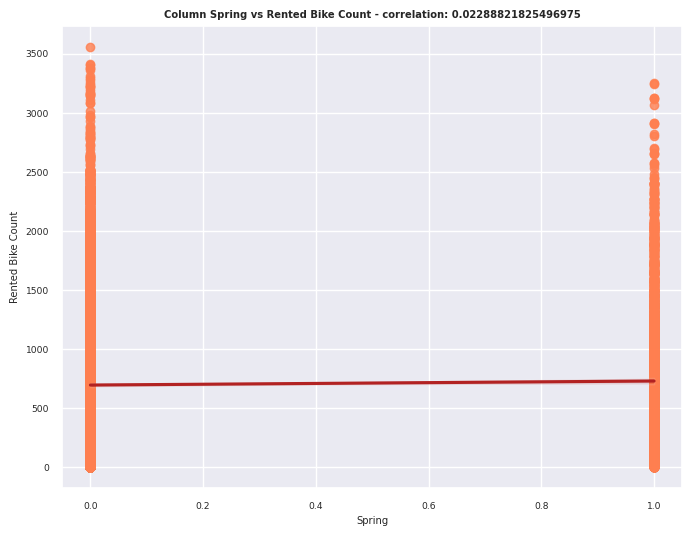

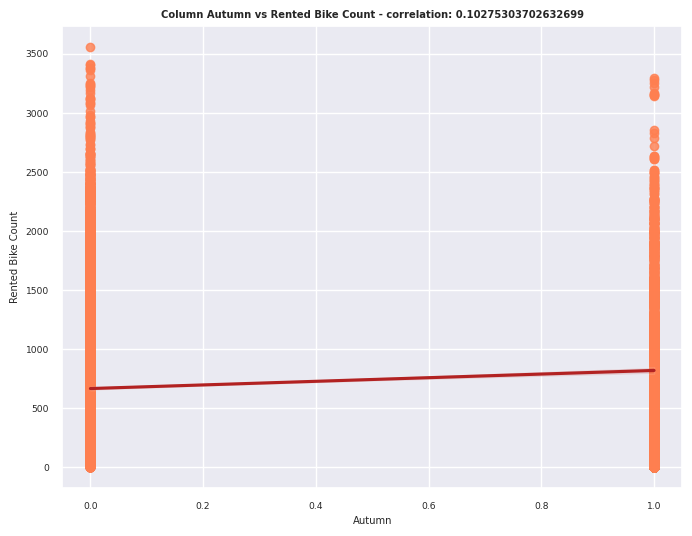

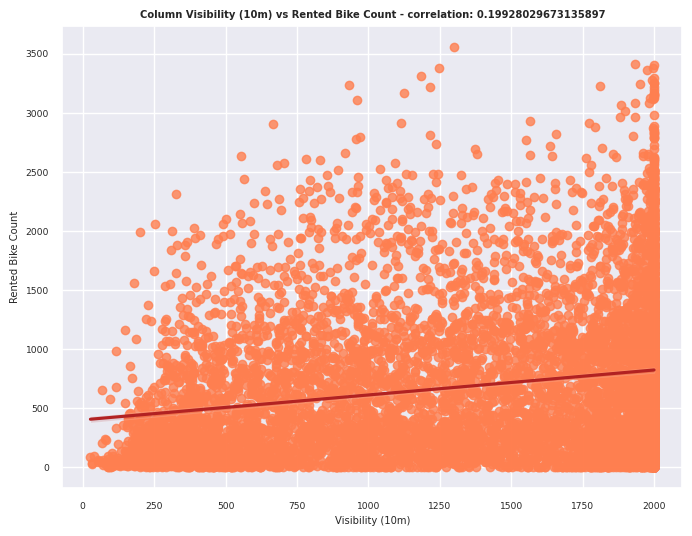

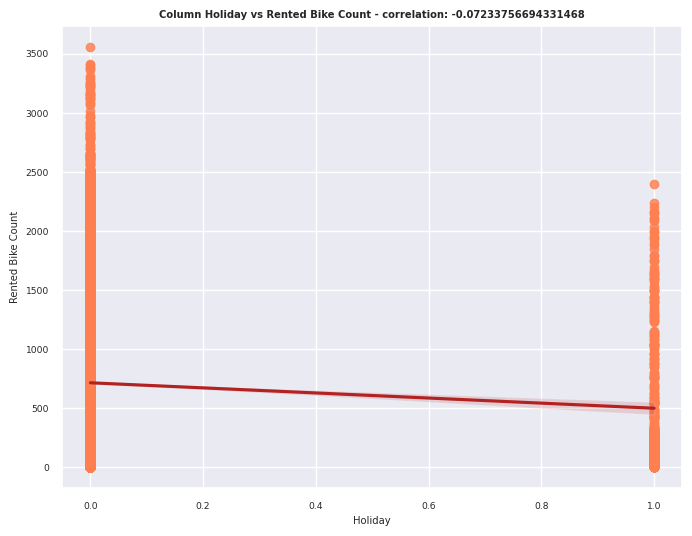

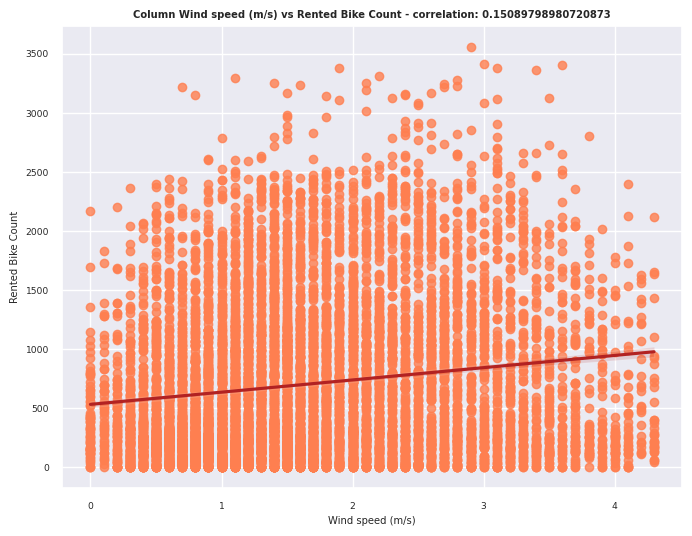

In [ ]:
#printing the regression plot for all the numerical features
for col in independent_cols:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=dataset[col], y=dataset['Rented Bike Count'], scatter_kws={"color": 'coral'}, line_kws={"color": "firebrick"})
    corr = dataset[col].corr(dataset['Rented Bike Count'])
    plt.title('Column {} vs Rented Bike Count - correlation: {}'.format(col, corr),fontweight='bold')


This statement implies that after checking the scatter plots and regression lines of all the independent variables with the dependent variable, it has been found that all the independent variables have a linear relationship with the dependent variable, which is one of the assumptions of linear regression modeling. Therefore, the data meets the necessary assumptions and can be used to build a linear regression model.






###**PREPARING X AND Y VARIABLE**

In [ ]:
#Creating the dataset for independent variables
X = dataset.drop(columns=['Rented Bike Count'],axis=1)

In [ ]:
# dependent variable first look
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0


In [ ]:
#Creating the dataset for  dependent variables
Y=dataset['Rented Bike Count']

In [ ]:
# printing dependent variable dataset
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

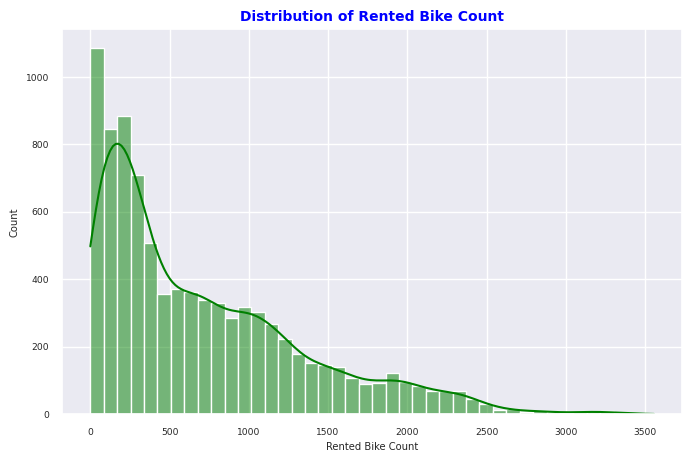

Skewness of Rented Bike Count:  1.1532306631480034


In [ ]:
#Plotting a histogram to check the distribution of the dependent variable
plt.figure(figsize=(8,5))
plt.title("Distribution of Rented Bike Count",size=10,fontweight='bold',color='blue')
sns.histplot(data=dataset, x='Rented Bike Count',color='green',kde=True)
plt.show()

#Calculating the skewness of the dependent variable
from scipy.stats import skew
print("Skewness of Rented Bike Count: ", skew(dataset['Rented Bike Count']))

If the dependent variable is positively skewed, applying a square root transformation can help to reduce the skewness and bring the data closer to a normal distribution. This can be beneficial because linear regression models typically assume that the data follows a normal distribution, and violating this assumption can result in biased or inefficient estimates of the model parameters.

By applying a square root transformation to the dependent variable, the resulting values will be the square root of the original values. This can help to spread out the values of the dependent variable and reduce the impact of extreme values on the analysis. However, it's important to note that transforming the dependent variable can also affect the interpretation of the model coefficients and may require back-transformation of the results to the original scale for meaningful interpretation.

In [ ]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [ ]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

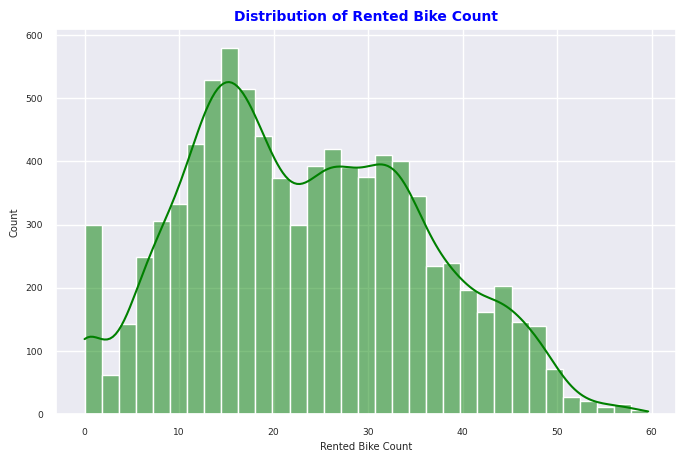

Skewness of Rented Bike Count:  0.23732144485836718


In [ ]:
#Plotting a histogram to check the distribution of the dependent variable
plt.figure(figsize=(8,5))
plt.title("Distribution of Rented Bike Count",size=10,fontweight='bold',color='blue')
sns.histplot(data=vis_Y, x='Rented Bike Count', color='green',kde=True)
plt.show()

#Calculating the skewness of the dependent variable
from scipy.stats import skew
print("Skewness of Rented Bike Count: ", skew(vis_Y['Rented Bike Count']))

It can be observed that the target variable has been transformed into a normal distribution, indicating that the normalization process was successful.

#### **Creating the test and train dataset:**

In [ ]:
# separate dataset into train and test
#Shape of the train set of the independent values
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
X_train.shape, X_test.shape

((7008, 10), (1752, 10))

In [ ]:
#printing 10 rows of training data
X_train[0:10]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn
2031,15,8.2,62,0.6,291,1.22,0,0,0,0
6570,18,28.4,57,2.4,2000,0.84,0,0,1,0
6371,11,29.9,57,1.7,1992,0.88,0,0,1,0
3490,10,14.8,29,0.6,1749,2.20,0,1,0,0
7700,20,12.2,47,1.1,2000,0.00,0,0,0,1
3136,16,20.9,34,1.5,2000,1.37,0,1,0,0
7122,18,22.3,53,2.7,2000,0.44,1,0,0,1
6376,16,31.7,56,1.9,2000,0.92,0,0,1,0
7071,15,21.8,76,1.4,2000,1.20,0,0,0,1
7294,22,14.6,46,2.2,2000,0.00,0,0,0,1


####**Feature Scaling**


> Feature scaling is a crucial step in data preprocessing that aims to standardize the independent features within a dataset to a fixed range. This technique is employed to address situations where the magnitudes, values, or units of the features vary significantly. Without feature scaling, machine learning algorithms may give undue importance to features with larger values and overlook those with smaller values, disregarding the unit of measurement.

>There are two commonly used methods for feature scaling: min-max normalization and standardization. In this project, I will utilize the standardization method, which involves using the StandardScaler() function. This function helps to transform the features so that they have a mean of 0 and a standard deviation of 1. By applying standardization, we can ensure that all features are on a comparable scale, allowing the machine learning algorithm to effectively interpret their relative importance during model training and prediction.








In [ ]:
#Creating object for the StandardScaler function
#Standardizing the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train[0:10]

array([[ 0.50774916, -0.38874606,  0.18996015, -1.12853903, -1.88204143,
         1.39419319, -0.23202281, -0.57866842, -0.57910781, -0.58042598],
       [ 0.9408263 ,  1.29850393, -0.05608294,  0.78580699,  0.92415496,
         0.77415027, -0.23202281, -0.57866842,  1.72679419, -0.58042598],
       [-0.06968702,  1.42379477, -0.05608294,  0.04133909,  0.91101887,
         0.83941794, -0.23202281, -0.57866842,  1.72679419, -0.58042598],
       [-0.21404607,  0.16253364, -1.43392422, -1.12853903,  0.51201026,
         2.99325127, -0.23202281,  1.72810536, -0.57910781, -0.58042598],
       [ 1.22954439, -0.05463715, -0.54816911, -0.59677625,  0.92415496,
        -0.59647094, -0.23202281, -0.57866842, -0.57910781,  1.72287258],
       [ 0.65210821,  0.67204972, -1.18788114, -0.17136602,  0.92415496,
         1.63894698, -0.23202281,  1.72810536, -0.57910781, -0.58042598],
       [ 0.9408263 ,  0.78898784, -0.25291741,  1.10486466,  0.92415496,
         0.1214735 ,  4.309921  , -0.57866842

##**6. ML Model Implementation**

>Machine learning models can be defined as programs that undergo training to discover patterns or relationships within data, enabling them to make predictions for new, unseen data.
For the specific project at hand, we are focused on solving a regression problem. As a result, we will employ regression models, which are designed to predict continuous numerical values.

>In this project we will be include the following models:

>   1.Linear regression

>   2.Ridge regression (Linear regression with L2 regularization)

>   3.Lasso regression (Linear regression with L1 regularization)

>   4.ElasticNet regression

>   5.Random forest regression.

####**1.Linear regression:**
>Linear regression is a supervised learning technique within regression analysis. It aims to predict the value of a dependent variable (y) based on the known value of an independent variable (x). By establishing a linear relationship between the input variable (x) and the output variable (y), linear regression seeks to model the underlying pattern in the data.

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# finding the intercept value
regressor.intercept_

23.55011559839751

In [ ]:
# finding regressor coefficient
regressor.coef_

array([ 3.48858354,  4.38063706, -3.22749856,  0.01903016,  0.23367551,
        0.16355461, -0.72505195,  2.44579688,  3.26932402,  2.72787662])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = regressor.predict(X_train)
Y_test_pred_lr = regressor.predict(X_test)

In [ ]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred, model):
    plt.figure(figsize=(8,5))
    plt.title(f"Comparison of actual values and predictions obtained by {model}",color='blue')
    plt.plot(y_test.values, label="Actual")
    plt.plot(y_pred, color='orange', label="Predicted")
    plt.legend()
    plt.show()

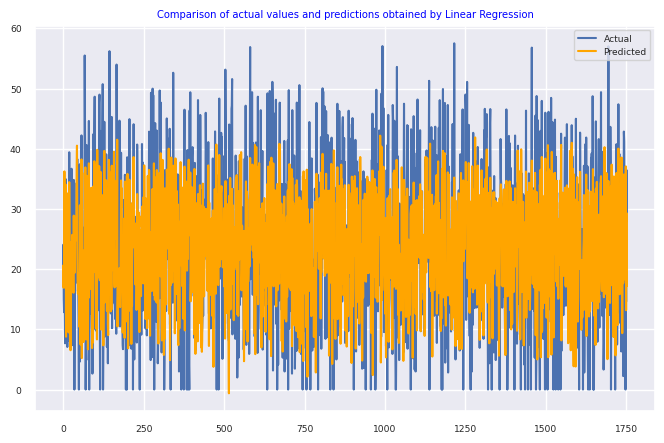

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def evaluate_model(y_pred, model):
    evaluate_model = {}
    evaluate_model['Model'] = model
    evaluate_model['MSE'] = mean_squared_error(y_test, y_pred)
    evaluate_model['RMSE'] = np.sqrt(evaluate_model['MSE'])
    evaluate_model['R2'] = r2_score(y_test, y_pred)
    evaluate_model['Adjusted R2'] = 1 - (1 - evaluate_model['R2']) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    print("The evaluation metrics for", evaluate_model['Model'], "are given as:")
    for metric, value in evaluate_model.items():
        print(metric + ":", value)

In [ ]:
#Calculating the evaluation metrics for Linear Regression
evaluate_model(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
Model: Linear Regression
MSE: 86.40827872868728
RMSE: 9.29560534492979
R2: 0.4513281331504828
Adjusted R2: 0.4481766577521513


####**Ridge Regression**:
Ridge regression is a technique used to estimate regression model coefficients when there is high correlation among the independent variables. It extends the linear regression model by incorporating L2 regularization.

In [ ]:
#Training the ridge regression model using GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,50,60,70,80,90,100]}
ridge_regressor=GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
best_alpha = ridge_regressor.best_params_['alpha']
best_score = ridge_regressor.best_score_

print("The best value for alpha in ridge regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)


The best value for alpha in ridge regression through GridSearchCV is found to be: 20
Using 20 as the value for alpha gives us a negative mean squared error of: -80.4745871022159


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=20).fit(X_train,y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

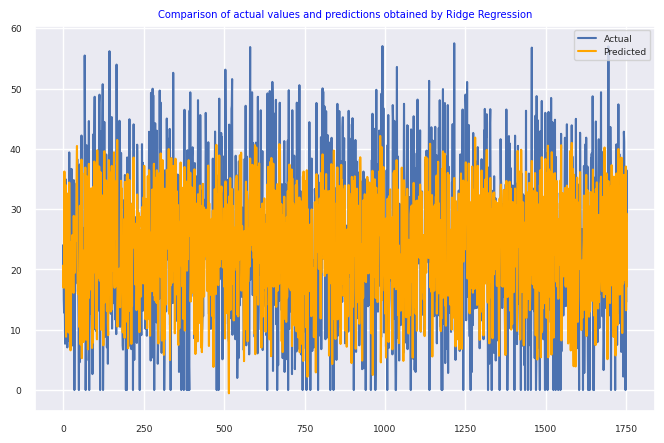

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
evaluate_model(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
Model: Ridge Regression
MSE: 86.40506737791893
RMSE: 9.295432608432968
R2: 0.451348524458435
Adjusted R2: 0.4481971661842158


**The results obtained from both Linear regression and Ridge regression show minimal differences.**


####**Lasso Regression:**
Lasso regression analysis is a technique used for linear regression models that combines shrinkage and variable selection. Its objective is to identify a subset of predictors that minimizes the prediction error for a quantitative response variable. Lasso regression employs the linear regression model with L1 regularization.

In [ ]:
#Creating a Lasso regression model using GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,5,10,20,30,35,40,50,60,70,80,90,100]}
lasso_regressor=GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
best_alpha = lasso_regressor.best_params_['alpha']
best_score = lasso_regressor.best_score_

print("The best value for alpha in lasso regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)

The best value for alpha in lasso regression through GridSearchCV is found to be: 0.01
Using 0.01 as the value for alpha gives us a negative mean squared error of: -80.47514172741528


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.01).fit(X_train,y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

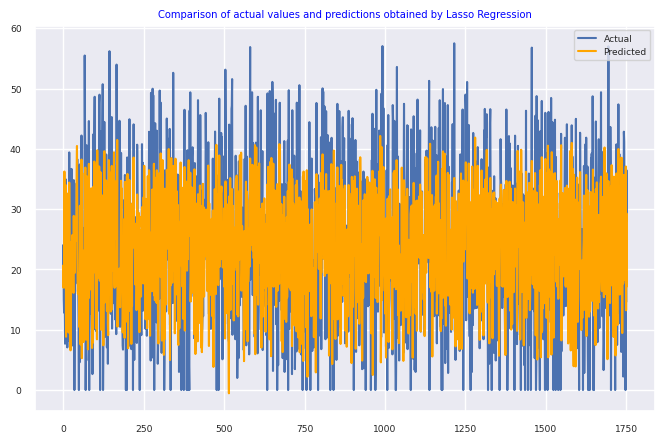

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Lasso Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
evaluate_model(Y_test_pred_ridge,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
Model: Lasso Regression
MSE: 86.40506737791893
RMSE: 9.295432608432968
R2: 0.451348524458435
Adjusted R2: 0.4481971661842158


**The model quality has deteriorated when applying the lasso regression method.**


####**ElasticNet Regression**
ElasticNet regression is a regularization technique that combines the properties of both Ridge regression and Lasso regression. It is used to address situations where there are high correlations among independent variables and when the number of predictors is large.

In [ ]:
#Creating a ElasticNet regression model using GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for ElasticNet regression fetched through GridSearchCV
best_alpha = elastic_regressor.best_params_['alpha']
best_score = elastic_regressor.best_score_
print("The best value for alpha in elastic regression through GridSearchCV is found to be:", best_alpha)
print(f"Using {best_alpha} as the value for alpha gives us a negative mean squared error of:", best_score)

The best value for alpha in elastic regression through GridSearchCV is found to be: 0.01
Using 0.01 as the value for alpha gives us a negative mean squared error of: -80.47515825767135


In [ ]:
#Fitting the ElasticNet regression model on the dataset with appropriate alpha value
elastic_model=ElasticNet(alpha=0.001).fit(X_train,y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_elastic = elastic_model.predict(X_test)

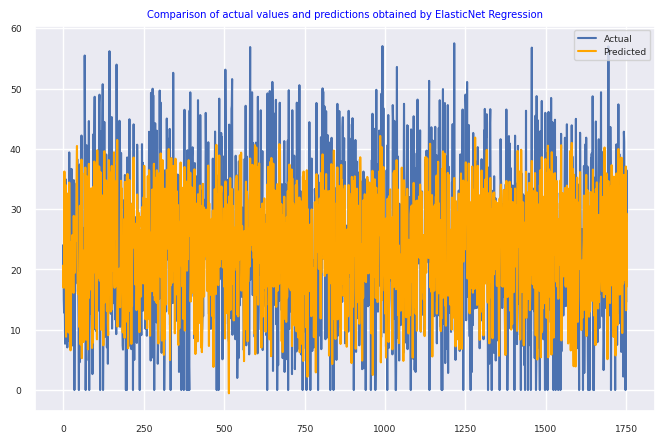

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'ElasticNet Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
evaluate_model(Y_test_pred_ridge,'ElasticNet Regression')

The evaluation metrics for ElasticNet Regression are given as:
Model: ElasticNet Regression
MSE: 86.40506737791893
RMSE: 9.295432608432968
R2: 0.451348524458435
Adjusted R2: 0.4481971661842158


After applying ElasticNet regression, it was observed that the model did not show significant improvement.

####**Random Forest Regression:**
A random forest is a machine learning algorithm that acts as a meta estimator. It constructs multiple decision trees by using different sub-samples of the dataset. By aggregating the predictions from these trees, it enhances predictive accuracy and helps prevent overfitting.

In [ ]:
# Create a Random Forest Regression model
rand_forest = RandomForestRegressor()

# Define the parameter grid for GridSearchCV
parameters = {
    'n_estimators': [10, 12, 15, 18, 20],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
rf_model_grid = GridSearchCV(estimator=rand_forest, param_grid=parameters, scoring='r2', cv=5)

# Fit the model to the training data
rf_model_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 18, 20]},
             scoring='r2')

In [ ]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}

Using {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7130545231592886


In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=20).fit(X_train,y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

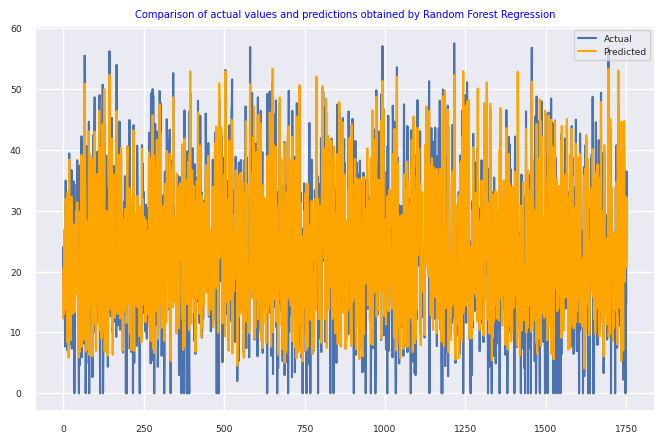

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [ ]:
#Calculating the evaluation metrics for Random Forest Regression
evaluate_model(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
Model: Random Forest Regression
MSE: 54.95463821743913
RMSE: 7.413139565490396
R2: 0.6510512142305669
Adjusted R2: 0.6490469133358545


**As we can see The quality of the model's predictions has significantly improved.**

##**7. Model Explainability:**

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME

SHAP

ELI-5

In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [ ]:
#Installing the shap library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 20.9 MB/s eta 0:00:00


In [ ]:
#Initialising javascript for visualisation of SHAP
import shap

In [ ]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

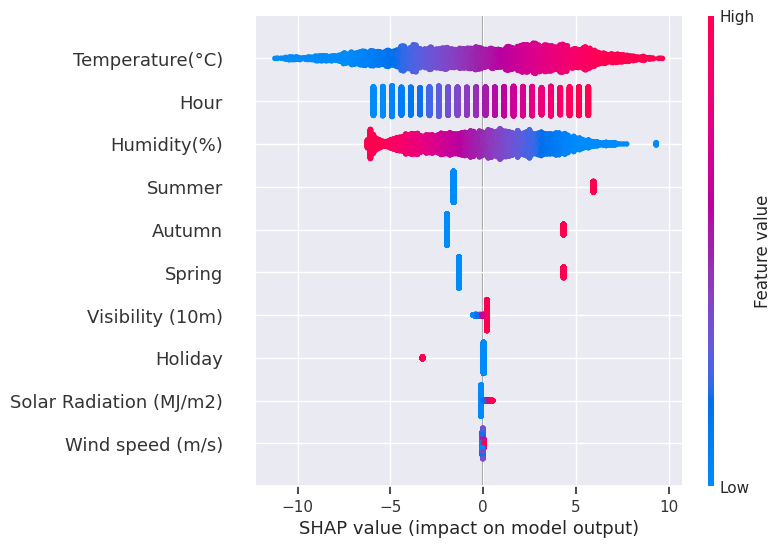

In [ ]:
#Plotting shap summary plot for linear regression
shap_summary(regressor)

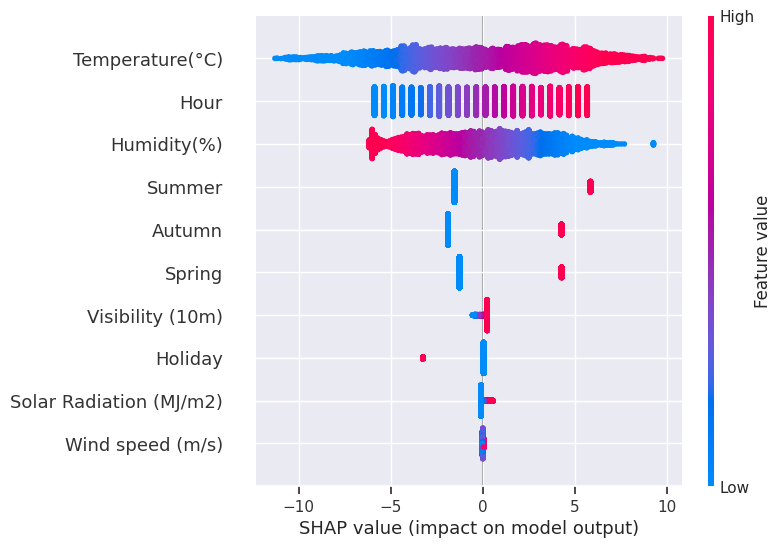

In [ ]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

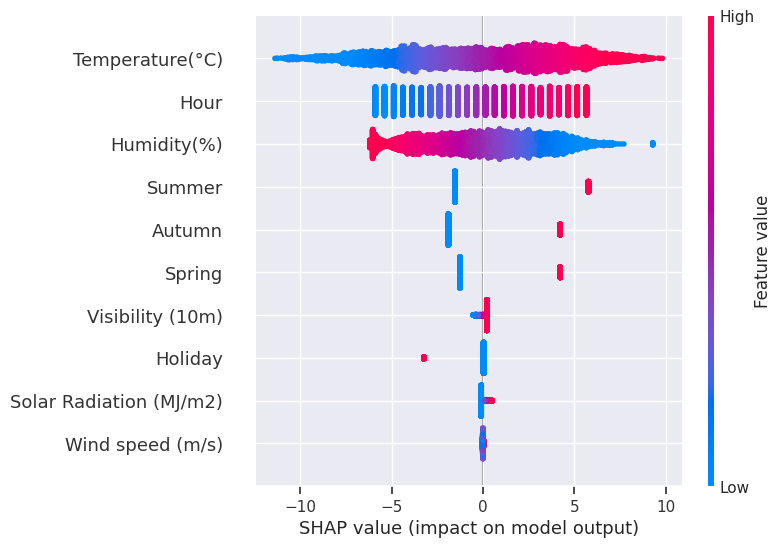

In [ ]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso_model)

 99%|===================| 6964/7008 [00:44<00:00]       

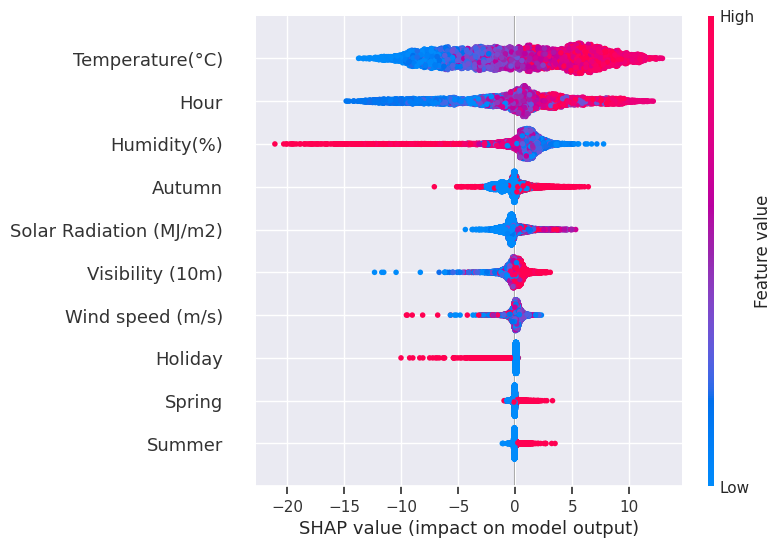

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

we see that Each model assigns different levels of importance or impact to the features, which ultimately determines their performance in making predictions. Among the four models, Random Forest stands out as it assigns a significant impact power to almost all the features, leading to its superior performance.

By examining the SHAP summary plot for each model, we can gain insights into the importance of each feature and assess its impact power by analyzing the corresponding SHAP values.






# **Conclusion**

**EDA INSIGHTS**

     1.The Summer season sees the highest number of bike rentals, while the 
     2.winter season experiences the lowest demand.
     3.Non-holiday days account for over 96% of bike rentals.
     4.Bike rentals peak in the temperature range of 15 to 30 degrees Celsius.
     5.Bike rentals are highest when there is no snowfall or rainfall.
     6.The majority of bike rentals occur when the humidity level ranges from 
       30% to 70%.
     7.The 18th hour, or 6pm, records the highest number of bike rentals, while
      the 4th hour, or 4am, has the lowest demand.
     8.Bike rentals are most frequent during periods of high visibility.

**ML RESULT**

     1. Among the models evaluated, Random Forest Regression performs the best
      with an r2 score of 0.65105.
     2.Lasso Regression (with L1 regularization) and ElasticNet Regression is 
     the least performing model, achieving an r2 score of 0.4513.
     3.Visualizations comparing actual values and predictions have been created 
     for all four models.
     4.The SHAP library has been utilized to provide explanations for each of
        the four models.
     5.According to all the models, temperature and hour are identified as the
      two most influential factors in predicting bike rentals.





**CHALLENGE FACED**
  
Removing Outliers.

Encoding the categorical columns.

Removing Multicollinearity from the dataset.

Choosing Model explainability technique.
   


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***